# <center> **Machine Learning**


---


# <center> PROJECT 1 2024


#  Ερώτημα 1: Υπολογισμός παραγώγων
---

 **1.1**

$f(x)=(x-a)^{T}A(x-a)=x^{T}A(x-a)-a^{T}A(x-a)$

$\frac{d}{dx}f(x)=\frac{d}{dx}(x^{T}A(x-a)-a^{T}A(x-a))=\frac{d}{dx}(x^{T}A)(x-a) + x^{T}\frac{d}{dx}(A(x-a))-a^{T}A\frac{d}{dx}(x-a)$



Από ιδιότητα 69 του $cookbook$ έχουμε οτι: $\frac{d}{dx}(x^{T}A) =A$

Επομένως, $\frac{d}{dx}f(x) =A(x-a) + x^{T}A-a^{T}A=Ax-Aa+x^TΑ-a^TΑ$

και αφού το Α είναι συμμετρικός θα ισχύει οτι $x^TΑ=xA^T=xA $ και $a^TΑ=aA^T=aA$

Άρα $\frac{d}{dx}f(x) = Ax-Aa+xΑ-aΑ=2A(x-a).$





**1.2**

Έχω f(x)=$||A-XB||^{2}_{F}$

Ξέρουμε ότι η Ευκλείδεια νόρμα είναι κυρτή συνάρτηση άρα το ολικό ελάχιστο θα είναι στο σημείο που μηδενίζεται η παράγωγος της συνάρτησης.

f(x)=$||A-XB||^{2}_{F}=Tr((A-XB)(A-XB)^{T})=Tr((A-XB)(A^{T}-(XB)^{T}))=Tr((A-XB)(A^{T}-B^{T}X^{T}))=Tr((AA^{T})-(XBA^{T})-(AB^{T}X^{T})+(XBB^{T}X^{T}))=
Tr(AA^{T})-Tr(XBA^{T})-Tr(AB^{T}X^{T})+Tr(XBB^{T}X^{T})$

και έχω να λύσω την εξίσωση

$$\frac{\partial f(x)}{\partial x}=0$$

$$\frac{\partial (Tr(AA^{T})-Tr(XBA^{T})-Tr(AB^{T}X^{T})+Tr(XBB^{T}X^{T}))}{\partial x}=0$$

$$\frac{\partial Tr(AA^{T})}{\partial x}-\frac{\partial Tr(XBA^{T})}{\partial x}-\frac{\partial Tr(AB^{T}X^{T})}{\partial x}+\frac{\partial Tr(XBB^{T}X^{T})}{\partial x}=0$$

Από το matrixcookbook έχω ότι :

$$\frac{\partial Tr(AA^{T})}{\partial x}=0$$
$$\frac{\partial Tr(XBA^{T})}{\partial x}=(BA^{T})^{T}$$
$$\frac{\partial Tr(AB^{T}X^{T})}{\partial x}=AB^{T}$$
$$\frac{\partial Tr(XBB^{T}X^{T})}{\partial x}=X(BB^{T})^{T}+XBB^{T}$$

Άρα έχω

$$0-(BA^{T})^{T}-AB^{T}+X(BB^{T})^{T}+XBB^{T}=0$$

$$-AB^{T}-AB^{T}+XBB^{T}+XBB^{T}=0$$

$$-2AB^{T}+2XBB^{T}=0$$

$$2XBB^{T}=2AB^{T}$$

$$XBB^{T}=AB^{T}$$

$$X=AB^{T}(BB^{T})^{-1}$$

#  Ερώτημα 2: Gradient Descent


---



In [ ]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
#data
X = np.array([10.63415642, -10.31804897,  -3.91323692,  13.47455445,
         12.00245098,   7.01459213, -11.5083141 ,   7.83875   ,
        -11.21021617,   6.95282804,   7.79101979,  13.94835343,
          3.01243432,  11.67679791,  13.41197807,  14.61995534,
         -8.70743264, -14.10312612, -11.68244994,  14.75202699,
          9.25316629,  -4.82661632,  -6.99915042,   6.49562369,
        -11.46126563,  -9.38897405,  -3.68953244,  -5.95603391,
        -10.80285714, -11.78004227])
Y = np.array([1.        ,   0.        ,   0.        ,   1.        ,
          1.        ,   1.        ,   0.        ,   1.        ,
          0.        ,   1.        ,   1.        ,   1.        ,
          1.        ,   1.        ,   1.        ,   1.        ,
          0.        ,   0.        ,   0.        ,   1.        ,
          1.        ,   0.        ,   0.        ,   1.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0. ])

def sigmoid(z):  #f1 function
    return 1 / (1 + np.exp(-z))

def gradient_descent(x, y, iterations, learning_rate):
    w0 = 0.1 #init,
    w1 = 1.0 #init,
    n = float(len(x)) #num of samples
    losses = []

    for i in range(iterations):

        #exponent of f1 function
        exponent = (w0 + w1*x)
        e_exponent =np.exp(exponent)

        # Calculating the gradients
        #the derivative of loss for every w
        w1_derivative = -1/n * sum((x/(e_exponent+1))+x*(y-1))
        w0_derivative = -1/n * sum((1/(e_exponent+1))+y-1)
        y_pred = sigmoid(exponent)  #f1

        # Computing the loss
        loss = -1 /n * np.sum(y * np.log2(y_pred) + (1 - y) * np.log2(1 - y_pred))
        losses.append(loss)


        # Updating weights
        w1 = w1 - (learning_rate * w1_derivative)
        w0 = w0 - (learning_rate * w0_derivative)
        #if(i>=140):                     uncomment these comments to run the program with different learning rate
          #learning_rate=0.0001
        #elif(i>=100):
          #learning_rate=5*0.0001
        #learning_rate-=10**-6

# Plotting both the cost function over iterations and the training data with the final model curve in a single subplot
    plt.figure(figsize=(10, 3))

# Plotting the cost function over iterations
    plt.subplot(1, 2, 1)
    plt.plot(range(1, len(losses) + 1), losses,  linestyle='-')
    plt.title('Cost Function over Iterations')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.grid(True)


    # Sort X array
    X_sorted = np.sort(X)

# Plotting the training data and the final model curve
    plt.subplot(1, 2, 2)
    plt.scatter(X, Y, color='blue', label='Training Data')
    y_values = sigmoid(w0 + w1 * X_sorted)
    plt.plot(X_sorted, y_values, color='red', label='Model')
    plt.title('Training Data and Model')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True)

    plt.suptitle(f'Learning rate={learning_rate}')
    plt.tight_layout()  # Adjust layout to prevent overlapy

    plt.show()

**2.1 for f1**

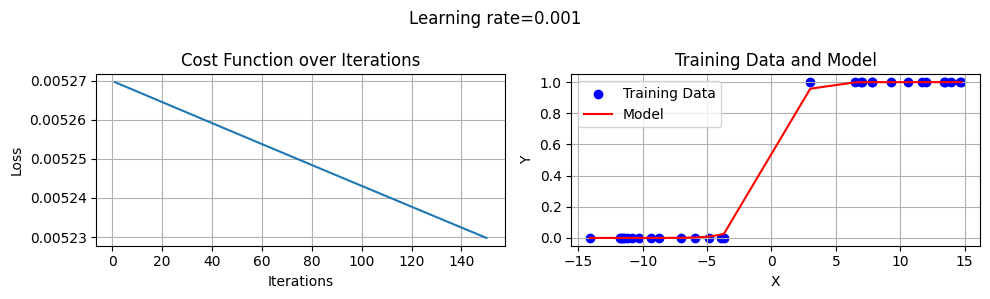

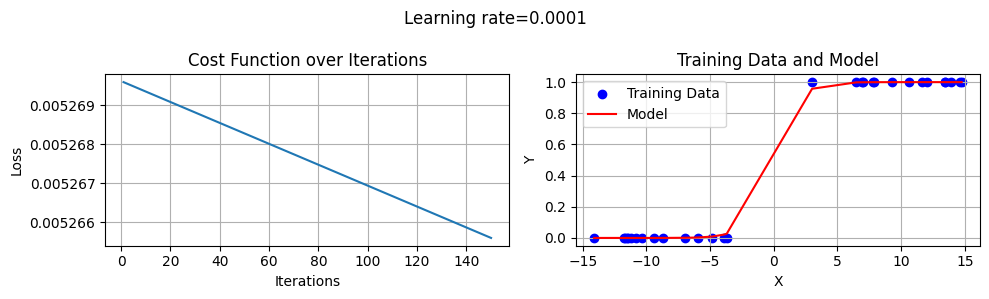

In [ ]:
# Estimating weight and bias using gradient descent
gradient_descent(X, Y, iterations=150,learning_rate = 0.001)
gradient_descent(X, Y, iterations=150,learning_rate = 0.0001)

**2.2 for f1**

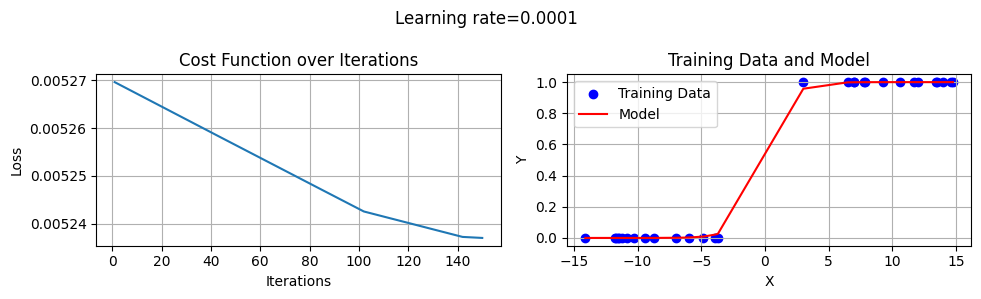

In [ ]:
gradient_descent(X, Y, iterations=150,learning_rate = 0.001)
#here is the execution where learning rate downgrades after an amount of iretations

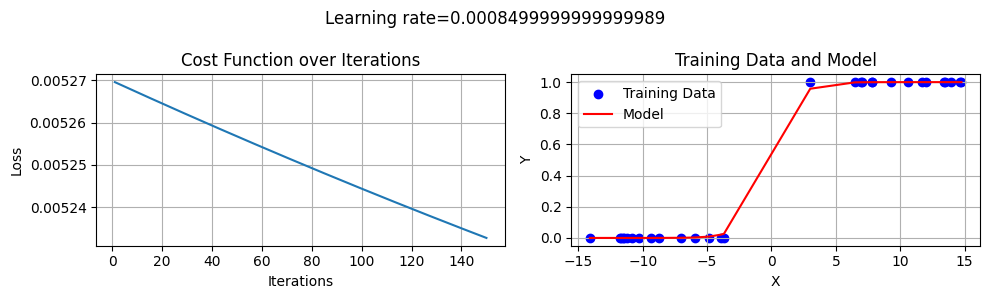

In [ ]:
gradient_descent(X, Y, iterations=150,learning_rate = 0.001)
#here is the execution where learning rate downgrades by 10^-6 after each iretation

In [ ]:
#data
X = np.array([-6.63823962e-01,  1.76259595e+00, -3.99908500e+00,
        -1.58133942e+00, -2.82595287e+00, -3.26129124e+00,
        -2.50991831e+00, -1.23551418e+00, -8.25860206e-01,
         3.10533872e-01, -6.46443885e-01,  1.48175600e+00,
        -2.36438200e+00,  3.02493949e+00, -3.78089925e+00,
         1.36374008e+00, -6.61561581e-01,  4.69518628e-01,
        -2.87690449e+00, -2.41518809e+00,  2.40595655e+00,
         3.74609261e+00, -1.49260657e+00,  1.53858093e+00,
         3.01111322e+00,  3.15685331e+00, -3.31964631e+00,
        -3.68756173e+00, -2.64135664e+00,  3.02514003e+00])
Y = np.array([-7.76859909e-02,  6.84885863e+00,  2.11068734e-02,
         2.91407607e-01, -5.50309589e-01,  5.72361855e-01,
         4.50795360e-01,  2.51247169e-01,  4.50427975e-01,
         2.58973769e+00, -7.76767080e-04,  5.97738329e+00,
        -1.33944040e-01,  1.13399962e+01, -3.45830376e-01,
         5.89284348e+00, -3.28271093e-01,  2.98595306e+00,
        -3.35623065e-01, -6.33229946e-03,  8.65921447e+00,
         1.33554857e+01,  8.29901089e-01,  6.98676486e+00,
         1.09374219e+01,  1.10267454e+01, -3.73579147e-01,
         8.46227301e-01,  2.54038774e-02,  1.07569223e+01])
def power(a):
  return (a*a)

def s_func(x, w2, w3):  # σ function
    s_args = w2 + w3 * x
    return np.where(s_args > 0, s_args, 0)

def f2(w0, w1, x, w2, w3):  #f2 function
    return w0 + w1 * s_func(x, w2, w3)

def gradient_descent_f2(x, y, iterations, learning_rate):

    w0 = 0.5 #init
    w1 = 1.0 #init
    w2 = 2.2 #init
    w3 = 3.4 #init
    n = float(len(x)) #num of samples
    losses = []

    for i in range(iterations):

        # Calculating the gradients
        #the derivative of loss for every w
        w0_derivative = -2/n * sum(y-f2(w0, w1, x, w2, w3))

        w1_derivative = -2/n * sum(s_func(x, w2, w3)*(y-f2(w0, w1, x, w2, w3)))

        s_values = s_func(x, w2, w3)
        #w2,w3 is 0 if s functions is <=0
        w2_derivative = -2/n * np.sum((w1 * (y - f2(w0, w1, x, w2, w3))) * (s_values > 0))
        w3_derivative = -2/n * np.sum((x * w1 * (y - f2(w0, w1, x, w2, w3))) * (s_values > 0))

        # Computing the loss
        loss = 1 /n * np.sum(power(y-f2(w0, w1, x, w2, w3)))
        losses.append(loss)

        # Updating weights

        w1 = w1 - (learning_rate * w1_derivative)
        w0 = w0 - (learning_rate * w0_derivative)
        w3 = w3 - (learning_rate * w3_derivative)
        w2 = w2 - (learning_rate * w2_derivative)

        #if(i>=140):                 uncomment these comments to run the program with different learning rate
          #learning_rate=0.0001
        #elif(i>=100):
          #learning_rate=5*0.0001
        #learning_rate-=10**-6




# Plotting the cost function over iterations
    plt.figure(figsize=(10, 3))

    # Subplot for cost function over iterations
    plt.subplot(1, 2, 1)
    plt.plot(range(1, len(losses) + 1), losses, linestyle='-')
    plt.title('Cost Function over Iterations')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.grid(True)

    # Sort the X array
    X_sorted = np.sort(X)

# Subplot for training data and the final model curve
    plt.subplot(1, 2, 2)
    plt.scatter(X, Y, color='blue', label='Training Data')
    y_values = f2(w0, w1, X_sorted, w2, w3)
    plt.plot(X_sorted, y_values, color='red', label='Model')
    plt.title('Training Data and Model')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True)
    plt.suptitle(f'Learning rate={learning_rate}')

    plt.tight_layout()  # Adjust layout to prevent overlap

    plt.show()

**2.1 for f2**

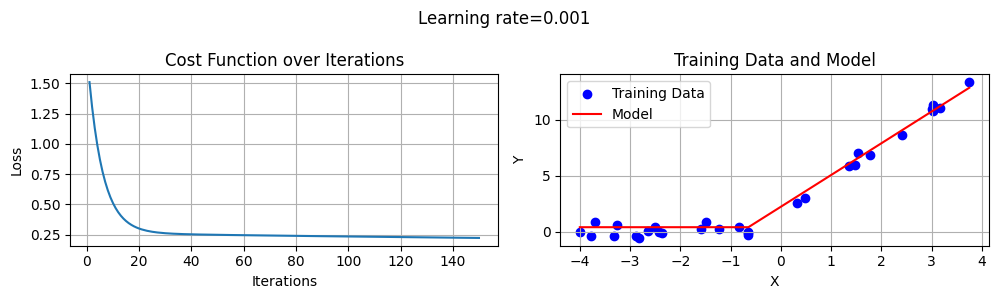

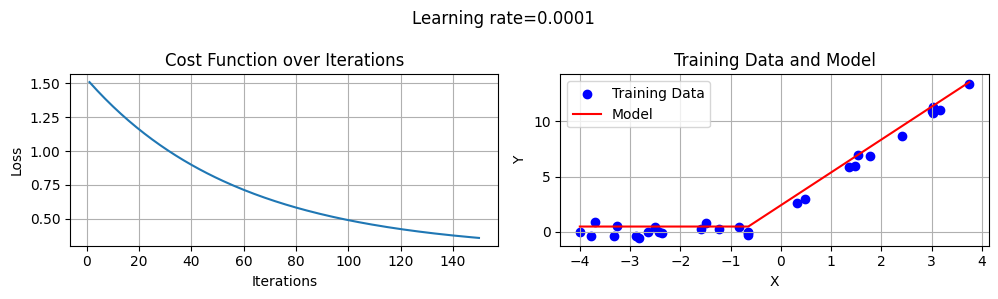

In [ ]:
# Estimating weight and bias using gradient descent
gradient_descent_f2(X, Y, iterations=150,learning_rate = 0.001)
gradient_descent_f2(X, Y, iterations=150,learning_rate = 0.0001)

**2.2 for f2**

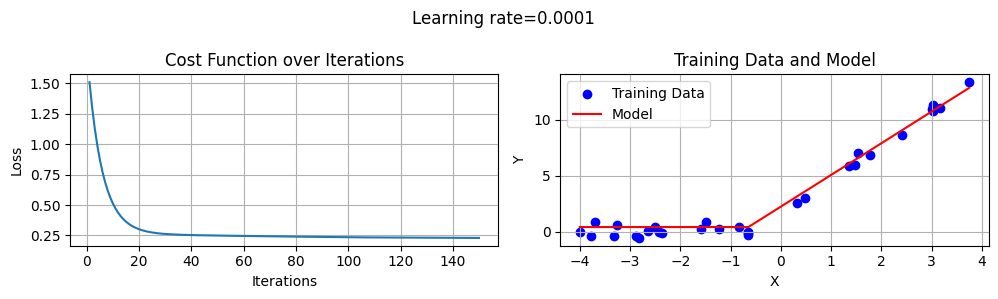

In [ ]:
gradient_descent_f2(X, Y, iterations=150,learning_rate = 0.001)
#here is the execution where learning rate downgrades after an amount of iretations

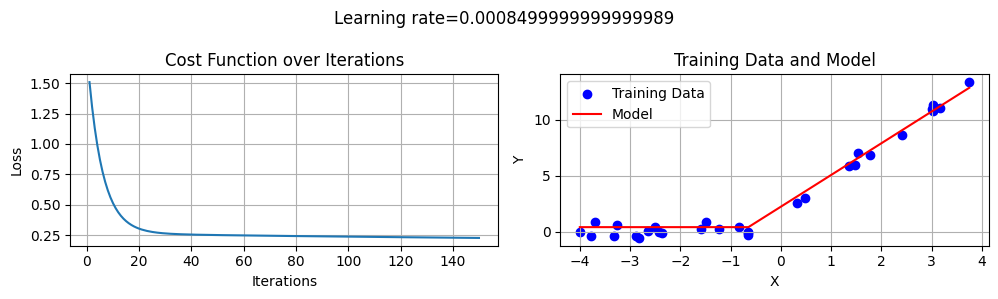

In [ ]:
gradient_descent_f2(X, Y, iterations=150,learning_rate = 0.001)
#here is the execution where learning rate downgrades by 10^-6 after each iretation

**Παρατηρήσεις:**

Τρέχοντας τον αλγρόριθμο Gradient Descent τόσο για την συνάρτηση f1 όσο και για την f2, παρατηρούμε πως για όλα τα διαγράμματα όσο αυξάνονται τα iretations μείωνεται το σφάλμα. Ωστόσο ο ρυθμός μείωσης διαφέρει απο διάγραμμα σε διάγραμμα,πράγμα που οφείλεται στην μεταβολή του learning rate.

Συγκρίνοντας τις εκτελέσεις με learning rate = 0.001 και learning rate = 0.0001 αντίστοιχα, παρατηρούμε ότι με learning rate = 0.001 και για τις 2 συναρτήσεις ο ρυθμός μείωσης είναι μεγαλύτερος, ειδικά στις πρώτες επαναλήψεις. Συγκεκριμένα στην περίπτωση της f2 βλέπουμε πως η καμπύλη στις πρώτες επαναλήψεθς πέφτει κατακόρυφα ενώ στην συνέχεια ο ρυθμός μείωσης της είναι πολύ μικρός.Στις εκτελέσεις με learning rate = 0.0001 ο ρυθμός μείωσης είναι πιο μικρός καταλήγοντας σε ελαφρώς μεγαλύτερο σφάλμα απ ότι στο 0.001.

Παρομόιως για τις εκτελέσεις όπου το αρχίζει από learning rate = 0.001 και μείωνεται μετά από ένα αριθμό επαναλήψεων ή μετά απο κάθε επανάληψη παρατηρούμε πως μετά την μεταβολή του, ο ρυθμός μείωσης του σφάλματος όλο και μικραίνει.

#  Ερώτημα 3: Face Recongnition


---



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os
import cv2
import numpy as np
from PIL import Image
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

**3.1-Load Images**

In [ ]:

def preprocess(img) : #preprocess for each image
  mean = img.mean()
  std = img.std()
  img = (img-mean)/std
  return img

def loadImages(path, set_number):
    images = []
    labels = []
    # Define the ranges for each set
    set_ranges = {
        "Set_1": range(1, 8),
        "Set_2": range(8, 20),
        "Set_3": range(20, 32),
        "Set_4": range(32, 46),
        "Set_5": range(46, 65)
    }

    # Get the range for the specified set
    set_range = set_ranges.get(set_number)

    if set_range is None:
        print("Invalid set number.")
        return None, None

    for image_name in os.listdir(path):
      image_number = int(image_name[9]+image_name[10])  # Extracting image number from image name
      person_id = int(image_name[6]+image_name[7])  # Extracting person ID from image name

      if image_number in set_range:

        # Open the image
        img = Image.open(os.path.join(path, image_name))
        # Resize the image to 50x50 (optional if it's already 50x50)
        img = img.resize((50, 50))
        # Convert the image to a NumPy array
        img = np.array(img)
        img = img.flatten()
        img=preprocess(img)

        labels.append(person_id)
        images.append(img)

    return np.array(images), np.array(labels)


**3.2-PCA,Eigenfaces**

In [ ]:

def compute_eigenfaces(images, num_components): #pca
    # Compute the covariance matrix
    cov_matrix = np.cov(images, rowvar=False)
    # Compute the eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    # Sort eigenvectors by eigenvalues in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvectors = eigenvectors[:, sorted_indices]
    # Select the top 'num_components' eigenvectors
    eigenfaces = eigenvectors[:, :num_components]
    return eigenfaces

def project_onto_eigenfaces(image, eigenfaces): #project the image into pcs
    return np.dot(image , eigenfaces)

def reconstruct_image(projection, eigenfaces): #reconstruciton of image
    X_reconstructed=np.dot(projection, eigenfaces.T)
    return X_reconstructed

# Display the original and reconstructed images
def display_image(image, title, shape=(50, 50)):
    plt.imshow(image.reshape(shape), cmap='gray')
    plt.title(title)
    plt.axis('off')


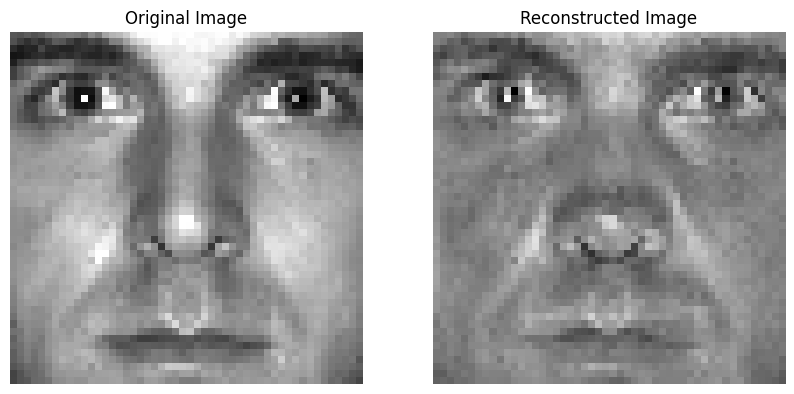

In [ ]:
path='/content/gdrive/MyDrive/ml/faces'
# Load images from Set_1
images,labels = loadImages(path, "Set_1")

# Ensure all images have been loaded correctly
if images is None or len(images) == 0:
    raise ValueError("No images loaded. Please check the dataset and path.")



# Compute eigenfaces with d=30
eigenfaces_30 = compute_eigenfaces(images, num_components=30)

# Select a random image from Set_1
random_index = np.random.randint(len(images))
random_image = images[random_index]

# Project the random image onto the eigenfaces
projection = project_onto_eigenfaces(random_image, eigenfaces_30)

# Reconstruct the image from the projection
reconstructed_image = reconstruct_image(projection, eigenfaces_30)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
display_image(random_image, 'Original Image')
plt.subplot(1, 2, 2)
display_image(reconstructed_image, 'Reconstructed Image')
plt.show()

Παρατηρούμε πως για διάσταση 30, η ανακατασκευασμένη εικόνα είναι σε ικανοποιητικό βαθμό ακριβής ωστόσο περιέχει ενα ποσοστό σφάλματος.

**3.3-Reconstruction Error**

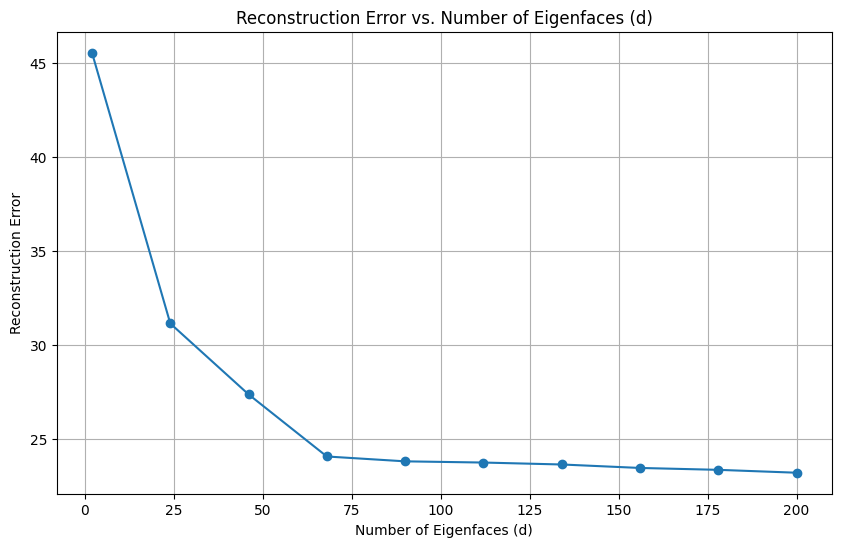

In [ ]:
# Initialize arrays to store errors and d values
errors = []
d_values = []

# Generate 10 equidistant values of d in the interval [2, 200]
d_values = np.linspace(2, 200, 10, dtype=int)
eigenfaces_dict = {}

# Loop through different values of d
for d in d_values:

    # Compute eigenfaces with current d
    eigenfaces = compute_eigenfaces(images,  num_components=d)
    eigenfaces_dict[d] = eigenfaces  # Store eigenfaces

    # Initialize array to store reconstruction errors for current d
    reconstruction_errors = []

    # Reconstruct all images and calculate reconstruction errors
    for idx, pre_image in enumerate(images):
        # Project the image onto the eigenfaces
        projection = project_onto_eigenfaces(pre_image, eigenfaces)

        # Reconstruct the image from the projection
        reconstructed_image = reconstruct_image(projection, eigenfaces)

        image=images[idx]
        # Compute reconstruction error
        error = np.linalg.norm(image - reconstructed_image)

        # Append error to the list
        reconstruction_errors.append(error)

    # Calculate the average error for current d
    average_error = np.mean(reconstruction_errors)

    # Append average error to the errors array
    errors.append(average_error)

# Plot the error for different d values
plt.figure(figsize=(10, 6))
plt.plot(d_values, errors, marker='o', linestyle='-')
plt.title('Reconstruction Error vs. Number of Eigenfaces (d)')
plt.xlabel('Number of Eigenfaces (d)')
plt.ylabel('Reconstruction Error')
plt.grid(True)
plt.show()

Παρατηρούμε πως όσω αυξάνεται η διάσταση d, το σφάλμα μειώνεται κάτι το αναμενόμενο.Στην αρχή η μείωση είναι απότομη ενώ απο την διάσταση 70 και μετά o ρυθμός μείωσης του σφάλματος είναι αρκετά μικρός.

**3.4-Top 9 eigenfaces**

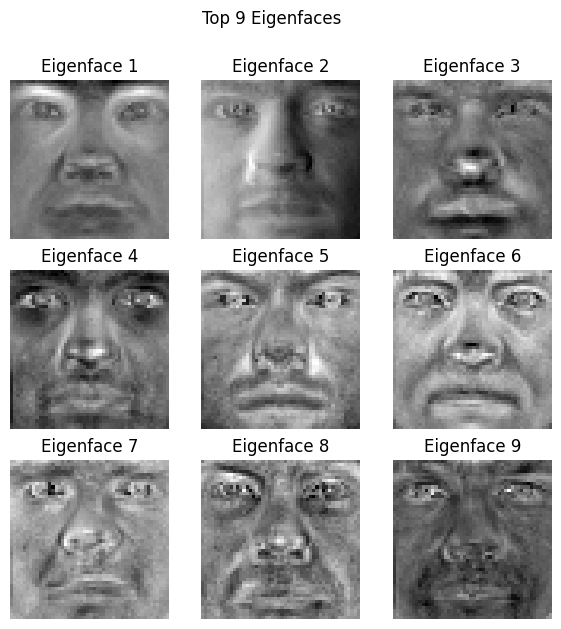

In [ ]:
# Visualize the top 9 eigenfaces

top_n_eigenfaces = 9
plt.figure(figsize=(7, 7))
for i in range(top_n_eigenfaces):
    plt.subplot(3, 3, i + 1)
    display_image(eigenfaces[:, i], f'Eigenface {i+1}')
plt.suptitle('Top 9 Eigenfaces')
plt.show()



Όπως ξέρουμε από την θεωρία τα ιδιοδιανύσματα που επιστρέφει η PCA είναι ορθογώνια μεταξύ τους και περιγράφουν τα κύρια στοιχεία των δεδομένων όπου περιέχουν την μεγαλύτερη διακύμανση μεταξύ των δεδομένων. Άρα θα έλεγε κανείς οτι περιγράφουν τα διαφορετικά χαρακτηριστηκά των 10 ανθρώπων όπως μάτια, η μύτη και τα χείλια. Επίσης βλέπουμε να περιγράφουν και την φωτεινότητα των εικόνων.

**3.5-Classification Performance Charts**

Set_1
d values:[  2  24  46  68  90 112 134 156 178 200]
accuracies:[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
 
Set_2
d values:[  2  24  46  68  90 112 134 156 178 200]
accuracies:[0.4083333333333333, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
 
Set_3
d values:[  2  24  46  68  90 112 134 156 178 200]
accuracies:[0.175, 0.95, 0.9583333333333334, 0.9583333333333334, 0.9583333333333334, 0.9583333333333334, 0.9583333333333334, 0.9583333333333334, 0.9583333333333334, 0.9583333333333334]
 
Set_4
d values:[  2  24  46  68  90 112 134 156 178 200]
accuracies:[0.1357142857142857, 0.42857142857142855, 0.4642857142857143, 0.4714285714285714, 0.4714285714285714, 0.4714285714285714, 0.4714285714285714, 0.4714285714285714, 0.4714285714285714, 0.4714285714285714]
 
Set_5
d values:[  2  24  46  68  90 112 134 156 178 200]
accuracies:[0.07894736842105263, 0.21578947368421053, 0.23684210526315788, 0.23684210526315788, 0.23684210526315788, 0.23684210526315788, 0.23684210526315788, 0.236842105

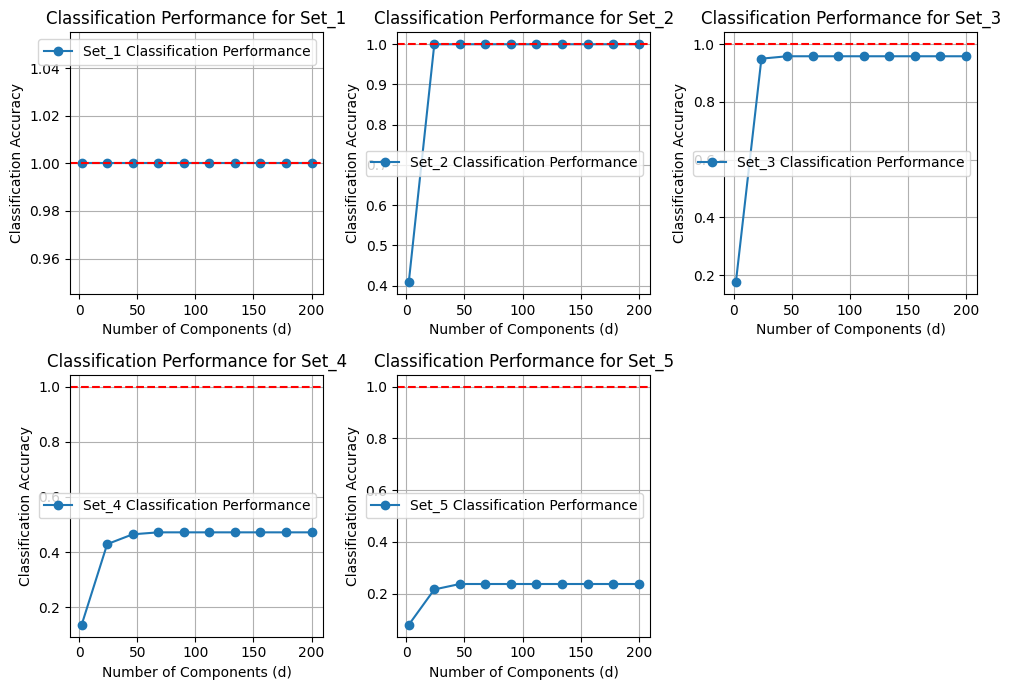

In [39]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
# Store projections for Set_1
# Compute eigenfaces for each d in d_values for Set_1
images_set1, labels_set1 = loadImages(path, "Set_1")
projections_set1_dict = {}
for d in d_values:
    eigenfaces = eigenfaces_dict[d]
    projections_set1 = np.array([project_onto_eigenfaces(img, eigenfaces) for img in images_set1])
    projections_set1_dict[d] = projections_set1


# Create subplots for classification performance for each set
fig, axes = plt.subplots(2, 3, figsize=(10, 7))

# Flatten the axes array for easy indexing
axes = axes.flatten()

knn = KNeighborsClassifier(n_neighbors=1)

for idx, set_name in enumerate(["Set_1", "Set_2", "Set_3", "Set_4", "Set_5"]):
    images, labels = loadImages(path, set_name)
    if images is None or len(images) == 0:
        continue

    accuracies = []

    for d in d_values:
        eigenfaces = eigenfaces_dict[d]
        projections = np.array([project_onto_eigenfaces(img, eigenfaces) for img in images])

        # Use KNN classification with projections from Set_1
        knn.fit(projections_set1_dict[d], labels_set1)  # Fit on Set_1 projections
        predicted_labels = knn.predict(projections)
        accuracy = accuracy_score(labels, predicted_labels)
        accuracies.append(accuracy)

    # Plot classification performance for the current set in a subplot
    axes[idx].plot(d_values, accuracies, marker='o', linestyle='-', label=f'{set_name} Classification Performance')
    print(set_name)
    print(f'd values:{d_values}')
    print(f'accuracies:{accuracies}')
    print(" ")
    axes[idx].set_title(f'Classification Performance for {set_name}')
    axes[idx].set_xlabel('Number of Components (d)')
    axes[idx].set_ylabel('Classification Accuracy')
    axes[idx].legend()
    axes[idx].grid(True)

    # Add a straight red line at accuracy 1.0
    axes[idx].axhline(y=1.0, color='red', linestyle='--')

fig.delaxes(axes[-1])

# Adjust layout
plt.tight_layout()
plt.show()


**a.**
Παρατηρούμε πως στο set2 από d 24 μεχρι 200, η απόδοση ταξινόμησης είναι τέλεια,στο 100%.
Ωστόσο στα άλλα sets η απόδοση αυτή πέφτει σε μεγάλο βαθμό, διατηρόντας την τιμή της απο d=24 μεχρι 200.
Αυτή η αλλαγή στην απόδοση οφείλεται στο γεγονός ότι τα eigenfaces που υπολογίζονται υπό καλές συνθήκες φωτισμού (Set_1) είναι λιγότερο αποτελεσματικές στην καταγραφή των χαρακτηριστικών εικόνων σε συνθήκες κακού φωτισμού οι οποίες επικρατούν στα άλλα sets.

**b.**
Όπως βλέπουμε για d=[68,200] η απόδοση παρεμένει σταθερή για κάθε set.

**c.**
Όπως απαντήσαμε στο b. θα επέλεγα μία τιμή απο το [68,200], αυτή θα ήταν η 68, καθώς βλέπουμε πως απο εκεί και μετά οσο αυξάνεται η διάσταση η απόδοση παραμένει ίδια.


**3.6-Reconstructed Images for every set**

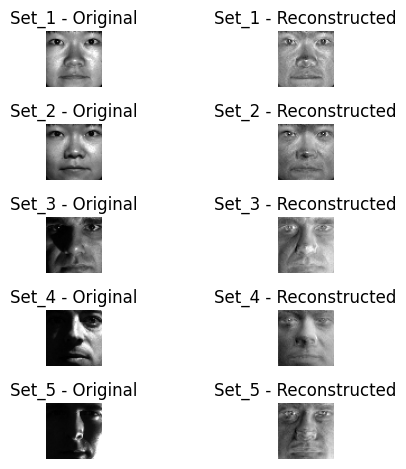

In [ ]:
fig, axes = plt.subplots(5, 2)

for idx, set_name in enumerate(["Set_1", "Set_2", "Set_3", "Set_4", "Set_5"]):
  images,_ = loadImages(path, set_name)
  # Select a random image from Set_1
  random_index = np.random.randint(len(images))
  random_image = images[random_index]

  # Project the random image onto the eigenfaces
  projection = project_onto_eigenfaces(random_image, eigenfaces_30)

  # Reconstruct the image from the projection
  reconstructed_image = reconstruct_image(projection, eigenfaces_30)

# Plot original image
  axes[idx, 0].imshow(random_image.reshape(50, 50), cmap='gray')
  axes[idx, 0].set_title(f'{set_name} - Original')
  axes[idx, 0].axis('off')

  # Plot reconstructed image
  axes[idx, 1].imshow(reconstructed_image.reshape(50, 50), cmap='gray')
  axes[idx, 1].set_title(f'{set_name} - Reconstructed')
  axes[idx, 1].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

Παρατηρούμε πως όσο πιο φωτεινή είναι η αρχική εικόνα τόσο πιο ακριβής είναι η ανακατασκευή της. Για σκοτεινές εικόνες η ανακατεσκευή είναι αρκετά θολή στα μαύρα σημεία της αρχικής εικόνας, καθώς εκεί το μοντέλο τείνει να τις ανακατασκευάσει με τον βέλτιστο τρόπο, αυξάνοντας τον φωτισμό και εξάγοντας
χαρακτηριστικά που δεν φαίνονται εύκολα με ανθρώπινο μάτι.


**3.7-SVD Algrorithm**

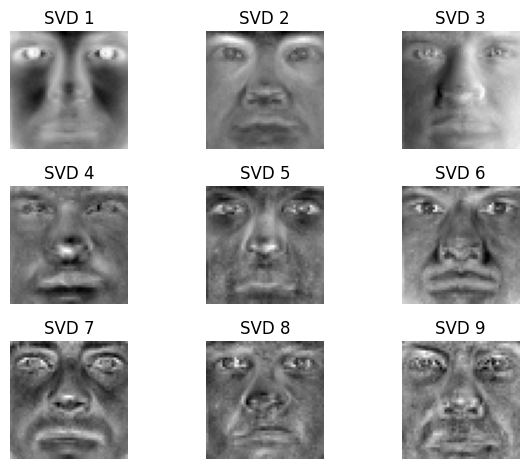

In [ ]:
n_components = 9
images,_ = loadImages(path, "Set_1")
U, s, Vt = np.linalg.svd(images, full_matrices=False)
eigenfaces = Vt[:n_components, :]

# Reshape and display the eigenfaces
fig, axs = plt.subplots(3, 3)
for i, ax in enumerate(axs.flat):
    eigenface = eigenfaces[i].reshape(50, 50)
    ax.imshow(eigenface, cmap='gray')
    ax.set_title(f'SVD {i+1}')
    ax.axis('off')
plt.tight_layout()
plt.show()

Εφαρμόζουμε διαφορετική τεχνική μείωσης διάστασης των δεδομένων, την λεγόμενη SVD, με την οποία προκύπτουν ξανά οι 9 συνιστώσες των εικόνων (eigenfaces).

Οι καινούργιες εικόνες όπως παρατηρούμε μοιάζουν πάρα πολύ με εκείνες της μεθόδου PCA. Μερικές από τις εικόνες είναι πανομοιότυπες, ενώ άλλες φαίνεται να έχουν διαφορετικό χρωματισμό, όμως τα χαρακτηριστικά του προσώπου τα οποία περιγράφουν είναι ίδια με εκείνα της pca μεθόδου.

Οι διαφορές αυτές μπορεί να οφείλονται στο γεγονός οτι η pca χρησιμοποιεί κεντράρισμα δεδομένων και κλιμάκωση αλλά και σε διαφορές κανονικοποίησης.